<a href="https://colab.research.google.com/github/jeff547/pytorch-learning/blob/main/exercises/08_pytorch_paper_replicating_exercise/08_pytorch_paper_replicating_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08. PyTorch Paper Replicating Exercises

Welcome to the 08. PyTorch Paper Replicating exercises.

Your objective is to write code to satisify each of the exercises below.

Some starter code has been provided to make sure you have all the resources you need.

> **Note:** There may be more than one solution to each of the exercises.

## Resources

1. These exercises/solutions are based on [section 08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/tjpW_BY8y3g) (but try the exercises yourself first!).
3. See [all solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

> **Note:** The first section of this notebook is dedicated to getting various helper functions and datasets used for the exercises. The exercises start at the heading "Exercise 1: ...".

### Get various imports and helper functions

The code in the following cells prepares imports and data for the exercises below. They are taken from [08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/).

In [ ]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    %pip install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu126
    %pip install ai_edge_torch
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")


[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cu126
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.5/832.5 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.27.3
    Uninstalling nvidia-nccl-cu12-2.27.3:
      Successfully uninstalled nvidia-nccl-cu12-2.27.3
  Attempting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.4/439.4 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.3/192.3 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 135.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

### Get data

Want to download the data we've been using in PyTorch Paper Replicating: https://www.learnpytorch.io/08_pytorch_paper_replicating/#1-get-data

In [4]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [5]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

### Preprocess data

Turn images into tensors using same code as PyTorch Paper Replicating section 2.1 and 2.2: https://www.learnpytorch.io/08_pytorch_paper_replicating/#21-prepare-transforms-for-images

In [11]:
# Create image size (from Table 3 in the ViT paper)
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [12]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7d475862d670>,
 ['pizza', 'steak', 'sushi'])

In [13]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(1))

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

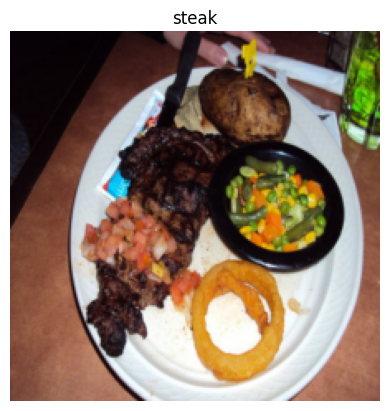

In [14]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False)

## 1. Replicate the ViT architecture we created with in-built [PyTorch transformer layers](https://pytorch.org/docs/stable/nn.html#transformer-layers).

* You'll want to look into replacing our `TransformerEncoderBlock()` class with [`torch.nn.TransformerEncoderLayer()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html#torch.nn.TransformerEncoderLayer) (these contain the same layers as our custom blocks).
* You can stack `torch.nn.TransformerEncoderLayer()`'s on top of each other with [`torch.nn.TransformerEncoder()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoder.html#torch.nn.TransformerEncoder).

In [ ]:
%%writefile vit.py
import torch
from torch import nn

class PatchEmbedding(nn.Module):
  def __init__(self,
               in_channels:int=3,
               patch_size:int=16,
               embedding_dim:int=768):
    super().__init__()

    self.patcher = nn.Conv2d(in_channels=in_channels,
                             out_channels=embedding_dim,
                             kernel_size=patch_size,
                             stride=patch_size,
                             padding=0)

    self.flatten = nn.Flatten(start_dim=2,
                              end_dim=3)

  def forward(self, x):
    x = self.patcher(x)
    x = self.flatten(x)
    return x.permute(0,2,1)

class ViT(nn.Module):
  def __init__(self,
                img_size:int=224,
                in_channels:int=3,
                patch_size:int=16,
                num_transformers_layers:int=12,
                embedding_dim:int=768,
                mlp_size:int=3072,
                num_heads:int=12,
                mlp_dropout:float=0.1,
                embedding_dropout:float=0.1,
                num_classes:int=1000,):
    super().__init__()

    assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."

    self.num_patches = (img_size*img_size) // patch_size**2

    self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim), requires_grad=True)

    self.position_embedding = nn.Parameter(data=torch.randn(1,self.num_patches+1, embedding_dim), requires_grad=True)

    self.embedding_dropout = nn.Dropout(p=embedding_dropout)

    self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                          patch_size=patch_size,
                                          embedding_dim=embedding_dim)

    self.encoder_layer = nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                    nhead=num_heads,
                                                    dropout=mlp_dropout,
                                                    dim_feedforward=mlp_size,
                                                    )

    self.transform_encoder = nn.TransformerEncoder(self.encoder_layer,
                                                   num_layers=num_transformers_layers)

    self.classifer = nn.Sequential(
      nn.LayerNorm(normalized_shape=embedding_dim),
      nn.Linear(in_features=embedding_dim,
                out_features=num_classes)
    )

  def forward(self, x):
    BATCH_SIZE = x.shape[0]

    class_token = self.class_embedding.expand(BATCH_SIZE, -1, -1)

    x = self.patch_embedding(x)
    x = torch.cat((class_token, x), dim=1)
    x = self.position_embedding + x
    x = self.embedding_dropout(x)
    x = self.transform_encoder(x)
    x = self.classifer(x[:,0])
    return x

Overwriting vit.py


In [ ]:
random_img_tensor = torch.randn(1, 3, 224, 224).to(device)
vit = ViT(num_classes=len(class_names)).to(device)
vit(random_img_tensor)

NameError: name 'ViT' is not defined

In [ ]:
from torchinfo import summary

summary(model=vit,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

NameError: name 'vit' is not defined

## 2. Turn the custom ViT architecture we created into a Python script, for example, `vit.py`.

* You should be able to import an entire ViT model using something like`from vit import ViT`.
* We covered the art of turning code cells into Python scrips in [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/).


In [ ]:
!python vit.py

In [ ]:
from vit import ViT
vit = ViT(num_classes=3)
summary(model=vit,
        input_size=(1,3,224,224),
        )

c:\Users\jeffl\Documents\GitHub\pytorch-learning\.venv\Lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Layer (type:depth-idx)                        Output Shape              Param #
ViT                                           [1, 3]                    7,239,936
├─PatchEmbedding: 1-1                         [1, 196, 768]             --
│    └─Conv2d: 2-1                            [1, 768, 14, 14]          590,592
│    └─Flatten: 2-2                           [1, 768, 196]             --
├─Dropout: 1-2                                [1, 197, 768]             --
├─TransformerEncoder: 1-3                     [1, 197, 768]             --
│    └─ModuleList: 2-3                        --                        --
│    │    └─TransformerEncoderLayer: 3-1      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-2      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-3      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-4      [1, 197, 768]             7,087,872
│    │    └─TransformerEncoderLayer: 3-5      [1, 197, 

## 3. Train a pretrained ViT feature extractor model (like the one we made in [08. PyTorch Paper Replicating section 10](https://www.learnpytorch.io/08_pytorch_paper_replicating/#10-bring-in-pretrained-vit-from-torchvisionmodels-on-same-dataset)) on 20% of the pizza, steak and sushi data like the dataset we used in [07. PyTorch Experiment Tracking section 7.3](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#73-download-different-datasets)
* See how it performs compared to the EffNetB2 model we compared it to in [08. PyTorch Paper Replicating section 10.6](https://www.learnpytorch.io/08_pytorch_paper_replicating/#106-save-feature-extractor-vit-model-and-check-file-size).

In [17]:
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)
pretrained_vit_transforms = pretrained_vit_weights.transforms()

for param in pretrained_vit.parameters():
  param.requires_grad = False

pretrained_vit.heads = nn.Linear(in_features=768,out_features=len(class_names)).to(device)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


100%|██████████| 330M/330M [00:01<00:00, 220MB/s]


In [18]:
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=32,)

In [19]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=pretrained_vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 3]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [ ]:
# TODO: your code
from going_modular.going_modular import engine

optimizer = torch.optim.Adam(params = pretrained_vit.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

pretrained_vit_results = engine.train(pretrained_vit,
                       train_dataloader_pretrained,
                       test_dataloader_pretrained,
                       optimizer,
                       loss_fn,
                       10,
                       device)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# Plot the loss curves
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results)

## 4. Try repeating the steps from excercise 3 but this time use the "`ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1`" pretrained weights from [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16).
* Note: ViT pretrained with SWAG weights has a minimum input image size of (384, 384), though this is accessible in the weights `.transforms()` method.

In [ ]:
# TODO: your code
pretrained_vit_weights_V2 = torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1
pretrained_vit_V2 = torchvision.models.vit_b_16(weights=pretrained_vit_weights_V2).to(device)
pretrained_vit_transforms_V2 = pretrained_vit_weights_V2.transforms()

for param in pretrained_vit_V2.parameters():
  param.requires_grad = False

pretrained_vit_V2.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)


In [ ]:
train_dataloader_pretrained_V2, test_dataloader_pretrained_V2, class_names_V2 = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms_V2,
                                                                                                     batch_size=32,)

In [ ]:
from going_modular.going_modular import engine
optimizer = torch.optim.Adam(params=pretrained_vit_V2.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

pretrained_vit_results_v2 = engine.train(model=pretrained_vit_V2,
                                         train_dataloader=train_dataloader_pretrained_V2,
                                         test_dataloader=test_dataloader_pretrained_V2,
                                         optimizer=optimizer,
                                         loss_fn=loss_fn,
                                         epochs=5,
                                         device=device)

In [28]:
# Create a transform to normalize data distribution to be inline with ImageNet
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], # values per colour channel [red, green, blue]
                                 std=[0.229, 0.224, 0.225])

# Create a transform pipeline
simple_transform = transforms.Compose([
                                       transforms.Resize((224, 224)),
                                       transforms.ToTensor(), # get image values between 0 & 1
                                       normalize
])

# 5. Our custom ViT model architecture closely mimics that of the ViT paper, however, our training recipe misses a few things.
* Research some of the following topics from Table 3 in the ViT paper that we miss and write a sentence about each and how it might help with training:
    * **ImageNet-21k pretraining**
    * **Learning rate warmup**
    * **Learning rate decay**
    * **Gradient clipping**

In [4]:
vit_transform = torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1.transforms()

In [5]:
# TODO: your code
# train_data = torchvision.datasets.Food101(root="./data",
#                                     split="train",
#                                     transform=vit_transform,
#                                     download=True)

test_data = torchvision.datasets.Food101(root="./data",
                                    split="test",
                                    transform=vit_transform,
                                    download=True)
train_data

100%|██████████| 5.00G/5.00G [02:56<00:00, 28.3MB/s]


Dataset Food101
    Number of datapoints: 75750
    Root location: ./data
    split=train
    StandardTransform
Transform: ImageClassification(
               crop_size=[384]
               resize_size=[384]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           )

In [6]:
torch.set_default_device(device)
torch.get_default_device()

device(type='cuda', index=0)

In [32]:
big_vit_weights = torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1
big_vit = torchvision.models.vit_b_16(weights=big_vit_weights).to(device)

for param in big_vit.parameters():
  param.requires_grad = False

big_vit.heads = nn.Linear(in_features=768, out_features=101)

big_vit = torch.compile(big_vit)

Downloading: "https://download.pytorch.org/models/vit_b_16_swag-9ac1b537.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16_swag-9ac1b537.pth


100%|██████████| 331M/331M [00:01<00:00, 229MB/s]


KeyboardInterrupt: 

In [7]:
import os
import torch.multiprocessing as mp

mp.set_start_method('spawn', force=True)

num_workers = os.cpu_count()

# train_dataloader = torch.utils.data.DataLoader(
#     train_data,
#     batch_size=512,
#     shuffle=True,
#     num_workers=num_workers,
#     pin_memory=True,
#     generator=torch.Generator(device='cuda')
# )

# test_dataloader = torch.utils.data.DataLoader(
#     test_data,
#     batch_size=256,
#     num_workers=0,
#     pin_memory=True,
#     generator=torch.Generator(device='cuda')
# )
test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=256,
    num_workers=0,  # increase later if stable
    shuffle=False
)

In [ ]:
from torch.profiler import profile, record_function, ProfilerActivity
torch.set_float32_matmul_precision('high')

prof = torch.profiler.profile(
    activities=[
        torch.profiler.ProfilerActivity.CPU,
        torch.profiler.ProfilerActivity.CUDA,
    ],
    on_trace_ready=torch.profiler.tensorboard_trace_handler('./logs/vit'),
)

EPOCHS = 5
optimizer = torch.optim.Adam(params=big_vit.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss().to(device)
prof.start()
big_vit_results = engine.train(model=big_vit,
                               train_dataloader=train_dataloader,
                               test_dataloader=test_dataloader,
                               optimizer=optimizer,
                               loss_fn=loss_fn,
                               epochs=EPOCHS,
                               device=device)
prof.stop()

print(prof.key_averages())

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/My Drive/pytorch models/model.pth'
torch.save(big_vit.state_dict(), path)

## **DOWNLOADING MODEL**

In [2]:
%pip install --upgrade torch torchvision torchinfo ai_edge_torch tensorflow==2.19.0

import torch
import torchvision
from torchinfo import summary

  Using cached torchvision-0.23.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached ai_edge_torch-0.6.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached ai_edge_tensorflow-2.21.0.dev20250818-cp312-cp312-manylinux_2_27_x86_64.whl.metadata (4.5 kB)
  Using cached ai_edge_litert-1.4.0-cp312-cp312-manylinux_2_17_x86_64.whl.metadata (1.9 kB)
  Using cached ai_edge_quantizer-0.3.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached backports_strenum-1.2.8-py3-none-any.whl.metadata (3.6 kB)
INFO: pip is looking at multiple versions of ai-edge-tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached ai_edge_torch-0.5.0-py3-none-any.whl.metadata (2.1 kB)
INFO: pip is looking at multiple versions of ai-edge-torch to determine which version is compatible with other requirements. This could take a while.
  Using cached ai_edge_torch-0.4.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached ai_edge_torch-0.3.0-py3-none-an

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
loaded_vit = torchvision.models.vit_b_16(weights=None, image_size = 384).to(device)
loaded_vit.heads = torch.nn.Linear(in_features=768, out_features=101)

model_path = "/content/drive/My Drive/models/vit_model.pth"

state_dict = torch.load(model_path, map_location=torch.device(device))
state_dict = {k.replace("_orig_mod.", ""): v for k, v in state_dict.items()}

loaded_vit.load_state_dict(state_dict)

loaded_vit.eval()
loaded_vit.to(device)

summary(model=loaded_vit,
        input_size=(256, 3, 384, 384), # (batch_size, color_channels, height, width)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [256, 3, 384, 384]   [256, 101]           768                  True
├─Conv2d (conv_proj)                                         [256, 3, 384, 384]   [256, 768, 24, 24]   590,592              True
├─Encoder (encoder)                                          [256, 577, 768]      [256, 577, 768]      443,136              True
│    └─Dropout (dropout)                                     [256, 577, 768]      [256, 577, 768]      --                   --
│    └─Sequential (layers)                                   [256, 577, 768]      [256, 577, 768]      --                   True
│    │    └─EncoderBlock (encoder_layer_0)                   [256, 577, 768]      [256, 577, 768]      7,087,872            True
│    │    └─EncoderBlock (encoder_layer_1)                   [256, 577, 768]      [256, 577, 7

In [ ]:
correct = 0
total = 0
batch_count = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        if batch_count >= 10:
          break
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = loaded_vit(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        batch_count += 1

# Print accuracy
accuracy = 100 * correct / total
print(f'Accuracy on the validation set: {accuracy:.2f}%')

In [7]:
from PIL import Image

# Add any image file to PATH
image_path = "/content/sushi.jpg"
image = Image.open(image_path).convert("RGB")
input_tensor = vit_transform(image) # Preprocess tensor for ViT model
input_batch = input_tensor.unsqueeze(0).to(device)  # add batch dimension and add to device

In [8]:
with torch.no_grad():
  output = loaded_vit(input_batch)
  _, predicted_idx = torch.max(output, 1)

class_names = test_data.classes
predicted_class = class_names[predicted_idx.item()]

print(f"Predicted Class: {predicted_class}\n\nActual Class:")
plt.imshow(image)
plt.axis('off')
plt.show()

NameError: name 'test_data' is not defined

In [10]:
import ai_edge_torch
from google.colab import files

model_path = 'food101_vit.tflite'
sample_input = torch.rand(1, 3, 384, 384)

# Convert pytorch model to LiteRT
edge_model = ai_edge_torch.convert(loaded_vit.eval().cpu(), (sample_input,))

# Export model as .tflite
edge_model.export(model_path)

# Download locally
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
%pip install ai-edge-model-explorer

# Visualize Model
import model_explorer
model_explorer.visualize(model_path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.3 MB/s eta 0:00:00
ℹ️ Please re-run the cell in each new session

Loading extensions...
Loaded 8 extensions:
 - TFLite adapter (Flatbuffer)
 - TFLite adapter (MLIR)
 - TF adapter (MLIR)
 - TF adapter (direct)
 - GraphDef adapter
 - Pytorch adapter (exported program)
 - MLIR adapter
 - JSON adapter


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>